In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Convolution2D, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input 
from keras.optimizers import SGD 
np.random.seed(44)
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
#gpu configer
from tensorflow.python.client import device_lib
from keras.layers import BatchNormalization
#device_lib.list_local_devices()


In [20]:
print(tf.test.gpu_device_name())

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) #max: 1 gpu, 56 cpu




/device:GPU:0


X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


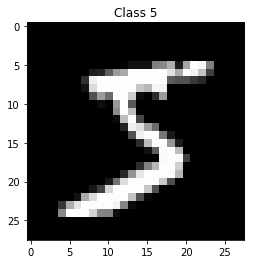

In [21]:
#224*224
#48*48

batch_size = 6000
num_classes = 10
epochs = 1000
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

shift = 0.2
gen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift,rotation_range=90,zca_whitening=True,featurewise_center=True, featurewise_std_normalization=True)

test_gen = ImageDataGenerator()

target_size=(224, 224, 3)

train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [0]:
def Resnet():
    # In order to make things less confusing, all layers have been declared first, and then used
    
    # declaration of layers
    input_img = Input((28, 28, 1), name='input_layer')
    zeroPad1 = ZeroPadding2D((1,1), name='zeroPad1', dim_ordering='th')
    zeroPad1_2 = ZeroPadding2D((1,1), name='zeroPad1_2', dim_ordering='th')
    layer1 = Convolution2D(6, 3, 3, subsample=(2, 2), init='he_uniform', name='major_conv', dim_ordering='th')
    layer1_2 = Convolution2D(16, 3, 3, subsample=(2, 2), init='he_uniform', name='major_conv2', dim_ordering='th')
    zeroPad2 = ZeroPadding2D((1,1), name='zeroPad2', dim_ordering='th')
    zeroPad2_2 = ZeroPadding2D((1,1), name='zeroPad2_2', dim_ordering='th')
    layer2 = Convolution2D(6, 3, 3, subsample=(1,1), init='he_uniform', name='l1_conv', dim_ordering='th')
    layer2_2 = Convolution2D(16, 3, 3, subsample=(1,1), init='he_uniform', name='l1_conv2', dim_ordering='th')


    zeroPad3 = ZeroPadding2D((1,1), name='zeroPad3', dim_ordering='th')
    zeroPad3_2 = ZeroPadding2D((1,1), name='zeroPad3_2', dim_ordering='th')
    layer3 = Convolution2D(6, 3, 3, subsample=(1, 1), init='he_uniform', name='l2_conv', dim_ordering='th')
    layer3_2 = Convolution2D(16, 3, 3, subsample=(1, 1), init='he_uniform', name='l2_conv2', dim_ordering='th')

    layer4 = Dense(64, activation='relu', init='he_uniform', name='dense1')
    layer5 = Dense(16, activation='relu', init='he_uniform', name='dense2')

    final = Dense(10, activation='softmax', init='he_uniform', name='classifier')
    
    # declaration completed
    
    first = zeroPad1(input_img)
    second = layer1(first)
    second = BatchNormalization(0, axis=1, name='major_bn')(second)
    second = Activation('relu', name='major_act')(second)

    third = zeroPad2(second)
    third = layer2(third)
    third = BatchNormalization(0, axis=1, name='l1_bn')(third)
    third = Activation('relu', name='l1_act')(third)

    third = zeroPad3(third)
    third = layer3(third)
    third = BatchNormalization(0, axis=1, name='l1_bn2')(third)
    third = Activation('relu', name='l1_act2')(third)


    res = merge([third, second], mode='sum', name='res')


    first2 = zeroPad1_2(res)
    second2 = layer1_2(first2)
    second2 = BatchNormalization(0, axis=1, name='major_bn2')(second2)
    second2 = Activation('relu', name='major_act2')(second2)


    third2 = zeroPad2_2(second2)
    third2 = layer2_2(third2)
    third2 = BatchNormalization(0, axis=1, name='l2_bn')(third2)
    third2 = Activation('relu', name='l2_act')(third2)

    third2 = zeroPad3_2(third2)
    third2 = layer3_2(third2)
    third2 = BatchNormalization(0, axis=1, name='l2_bn2')(third2)
    third2 = Activation('relu', name='l2_act2')(third2)

    res2 = merge([third2, second2], mode='sum', name='res2')

    res2 = Flatten()(res2)

    res2 = layer4(res2)
    res2 = Dropout(0.4, name='dropout1')(res2)
    res2 = layer5(res2)
    res2 = Dropout(0.4, name='dropout2')(res2)
    res2 = final(res2)
    model = Model(input=input_img, output=res2)
    
    
    sgd = SGD(decay=0., lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss=scc, optimizer=sgd, metrics=['accuracy'])
    return model

In [23]:
input_shape = (28,28,1)

model = Resnet()

model.summary()


keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D((1, 1), name="zeroPad1", data_format="channels_first")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `ZeroPadding2D` call to the Keras 2 API: `ZeroPadding2D((1, 1), name="zeroPad1_2", data_format="channels_first")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (3, 3), name="major_conv", strides=(2, 2), data_format="channels_first", kernel_initializer="he_uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), name="major_conv2", strides=(2, 2), data_format="channels_first", kernel_initializer="he_uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10:

TypeError: ignored

In [0]:



from matplotlib import pyplot as plt
history = model.fit_generator(train_generator, steps_per_epoch=60000//batch_size, epochs=epochs, 
                    validation_data=test_generator, validation_steps=10000//batch_size)


In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score)


epochs=10

model.fit_generator(train_generator, steps_per_epoch=60000//batch_size, epochs=epochs, 
                    validation_data=test_generator, validation_steps=10000//batch_size)

score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score)

model.fit_generator(train_generator, steps_per_epoch=60000//batch_size, epochs=epochs, 
                    validation_data=test_generator, validation_steps=10000//batch_size)

score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score)

model.fit_generator(train_generator, steps_per_epoch=60000//batch_size, epochs=epochs, 
                    validation_data=test_generator, validation_steps=10000//batch_size)

score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score)

model.fit_generator(train_generator, steps_per_epoch=60000//batch_size, epochs=epochs, 
                    validation_data=test_generator, validation_steps=10000//batch_size)

score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score)